# Logistic Regression
Logistic regression is used for binary classification where we use a sigmoid function, that takes input as independent variables and produces a probability between 0 and 1.

## Sigmoid Function
<p>
    <ul>
        <li>The sigmoid function is a mathematical function used to map the predicted values to probabilities.</li>
        <li>It maps any real value into another value within a range of 0 and 1. The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the “S” form.</li>
        <li>The S-form curve is called the Sigmoid function or the logistic function.</li>
        <li>In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.</li>
    </ul>
</p>

## Log Odds
<p>
    Odds is defined as the chances of success divided by the chances of failure. Say, there is a 90% chance that winning a wager implies that the ‘odds are in our favour’ as the winning odds are 90% while the losing odds are just 10%.<br>
     The log-odds, also known as the logit function, is the natural logarithm of the odds. In logistic regression, the log odds of the dependent variable are modeled as a linear combination of the independent variables and the intercept.
</p>

In [1]:
# Importing all libraries which we would use
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

We will load a dataset and apply logistic regression on it

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


On the above dataset we use logistic regression for checking if outcome is setosa or not

In [3]:
def if_setosa(string):
    if string == "setosa":
        return 1
    return 0


df["species_setosa"] = df["species"].apply(if_setosa)
df = df.drop("species", axis=1)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [5]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa
sepal_length,1.000000,-0.117570,0.871754,0.817941,-0.717416
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,0.603348
petal_length,0.871754,-0.428440,1.000000,0.962865,-0.922765
petal_width,0.817941,-0.366126,0.962865,1.000000,-0.887344
species_setosa,-0.717416,0.603348,-0.922765,-0.887344,1.000000


We will use the petal length as they have the highest correlation

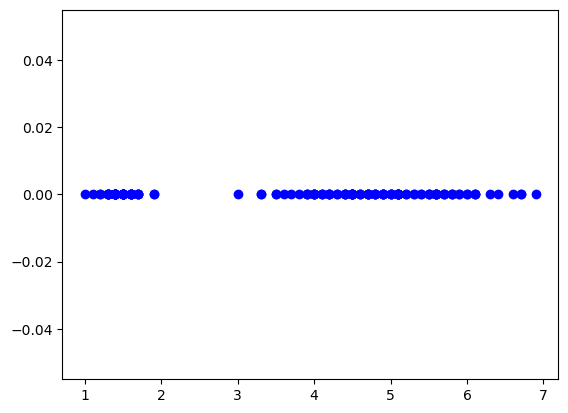

In [6]:
x = df["petal_length"]
y = [0]*len(df["petal_length"])
plt.scatter(x=x, y=y, color="Blue")
plt.show()

We can see from the above scatter plot that petal_length clearly influences if the outcome is setosa or not

In [7]:
def perceptron(X, y):
    def check(val):
        return 1 if val > 0 else 0

    intercepts = np.ones(X.shape[0])
    intercepts = pd.Series(intercepts)
    X = pd.DataFrame({'col1': intercepts, 'col2': X})
    rows, columns = X.shape
    weights = np.ones(columns)
    lr = 0.1

    for _ in range(1000):
        j = np.random.randint(0, rows)
        X_j = np.array(X.loc[j])
        y_hat = check(np.dot(X_j, weights))
        weights += lr*(y[j] - y_hat)*X_j

    return weights[0], weights[1:]

In [8]:
x = df["petal_length"]
y = df["species_setosa"]
intercept, coef = perceptron(x, y)

In [9]:
m = -(coef[0]/coef[0])
b = -(intercept/coef[0])

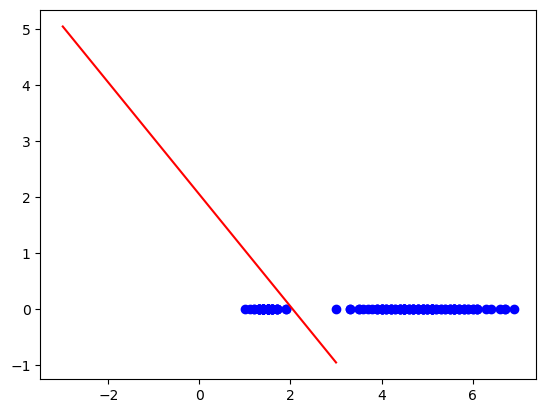

In [10]:
x_line = np.linspace(-3, 3, 100)
y_line = m*x_line + b

x = df["petal_length"]
y = [0]*len(df["petal_length"])
plt.plot(x_line, y_line, color="Red")
plt.scatter(x=x, y=y, color="Blue")
plt.show()

In [11]:
X = df[["petal_length"]]  # .iloc[:, :-1]
y = df["species_setosa"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=33)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
pred = model.predict(X_test)

In [13]:
accuracy_score(y_test, pred)

1.0

With an accuracy score of 100% our model has correctly predicted if the outcome would be setosa or not

In [14]:
confusion_matrix(y_test, pred)

array([[79,  0],
       [ 0, 41]])

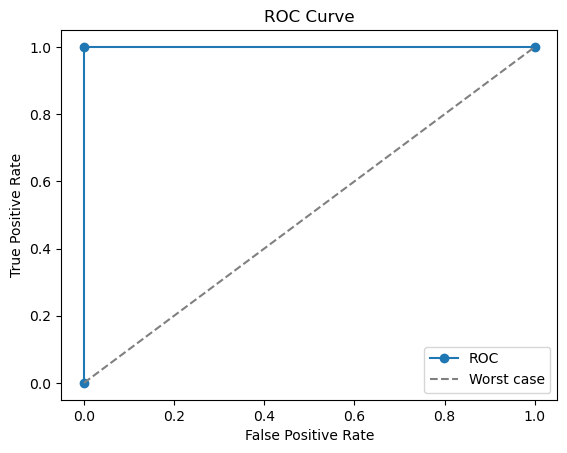

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.plot(fpr, tpr, 'o-', label="ROC")
plt.plot([0, 1], [0, 1], '--', color="Grey", label="Worst case")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()